1. Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one for the background). Add Gaussian noise to the image. Implement and test Otsu’s algorithm with this image.


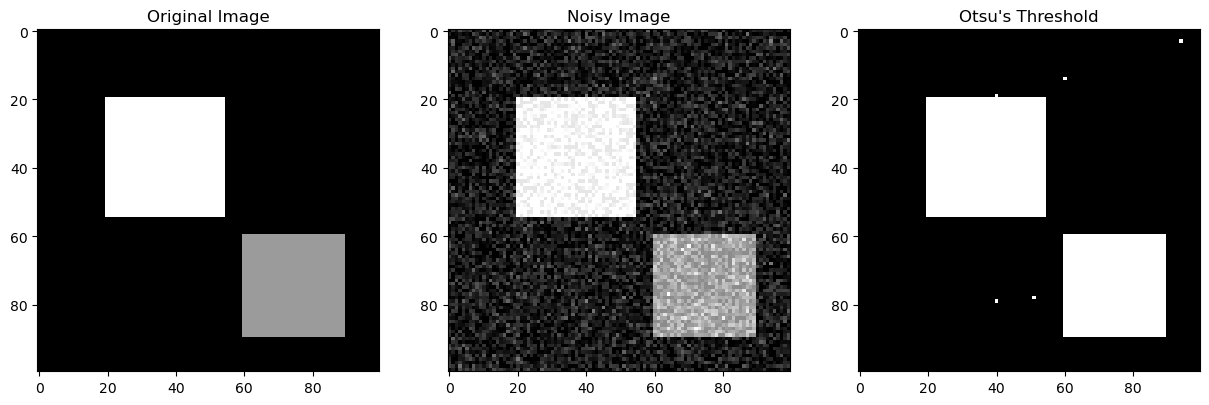

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def otsu_threshold(image):
    # get image histogram
    hist, _ = np.histogram(image, bins=np.arange(image.min(), image.max()+2))

    # normalize histogram
    hist_norm = hist.astype('float') / hist.sum()

    # initialize variables
    sum_b = 0
    w_b = 0
    max_var = 0
    threshold = 0

    # calculate total mean
    total_mean = (np.arange(1, hist_norm.size+1) * hist_norm).sum()

    # iterate over all possible thresholds
    for i in range(1, hist_norm.size):
        w_b += hist_norm[i-1]
        if w_b == 0:
            continue

        w_f = 1 - w_b
        if w_f == 0:
            break

        sum_b += (i-1) * hist_norm[i-1]
        mean_b = sum_b / w_b
        mean_f = (total_mean - sum_b) / w_f

        # calculate between-class variance
        var_between = w_b * w_f * (mean_b - mean_f)**2

        # update threshold if variance is larger than max
        if var_between > max_var:
            max_var = var_between
            threshold = i-1

    # apply threshold to the image
    binary = image >= threshold

    return binary, threshold

# Create an image with 2 objects and a total of 3-pixel values
img = np.zeros((100, 100), dtype=np.uint8)
img[20:55, 20:55] = 230
img[60:90, 60:90] = 140

# Add Gaussian noise to the image
gauss_noise = np.zeros((100,100), dtype=np.uint8)
cv2.randn(gauss_noise, 50, 60)
gauss_noise = (gauss_noise*0.5).astype(np.uint8)
img_noisy = cv2.add(img, gauss_noise)

# Otsu's thresholding
otsu_threshold, threshold_value = otsu_threshold(img_noisy)

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(img_noisy, cmap='gray')
axs[1].set_title('Noisy Image')
axs[2].imshow(otsu_threshold, cmap='gray')
axs[2].set_title("Otsu's Threshold")
plt.show()


2. Implement a region-growing technique for image segmentation. The basic idea is to start from a set of points inside the object of interest (foreground), denoted as seeds, and recursively add neighboring pixels as long as they are in a pre-defined range of the pixel values of the seeds.


C:\Users\Kelum Madusanka\AppData\Local\Temp\ipykernel_22296\1949766331.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
  if abs(img[x, y] - img[current_point]) < thresh and region[x, y] == 0:


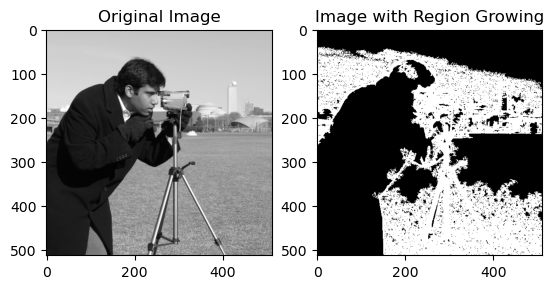

In [16]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt

image = data.camera()

# Define region growing function
def region_growing(img, seed, thresh):
    # Initialize the output image
    height, width = img.shape[:2]
    region = np.zeros_like(img)
    
    # Define the neighbors
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0), (-1, -1), (1, 1), (-1, 1), (1, -1)]
    
    # Create a list to hold the pixels to be checked
    check_list = [seed]
    
    # Loop until all pixels in the list have been checked
    while len(check_list) > 0:
        # Pop the first pixel from the list
        current_point = check_list.pop(0)
        
        # Check the neighbors of the current pixel
        for i in range(8):
            # Calculate the coordinates of the neighbor pixel
            x = current_point[0] + neighbors[i][0]
            y = current_point[1] + neighbors[i][1]
            
            # Check if the neighbor is within the image boundaries
            if x >= 0 and y >= 0 and x < height and y < width:
                # Check if the neighbor is within the threshold range
                if abs(img[x, y] - img[current_point]) < thresh and region[x, y] == 0:
                    # Add the neighbor pixel to the region and the check list
                    region[x, y] = 255
                    check_list.append((x, y))
                    
    return region

# Set the seed point and threshold value
seed_point = (100, 100)
threshold = 220

# Apply region growing
region = region_growing(image, seed_point, threshold)

# Display the output image
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(region, cmap='gray')
plt.title('Image with Region Growing')

plt.show()


C:\Users\Kelum Madusanka\AppData\Local\Temp\ipykernel_21084\3073533785.py:35: RuntimeWarning: overflow encountered in ubyte_scalars
  if abs(img[x, y] - img[current_pixel]) < threshold and output_img[x, y] == 0:


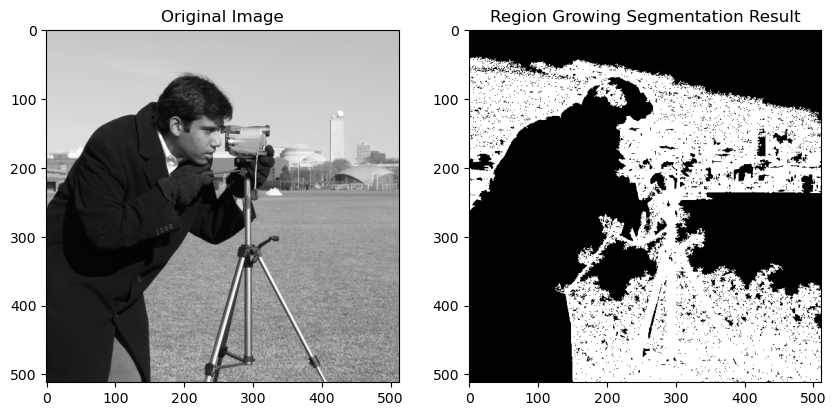

In [1]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt

# Load an example image
image = data.camera()

# Define the region growing function
def region_growing(img, seed, threshold):
    # Initialize the output image
    height, width = img.shape[:2]
    output_img = np.zeros_like(img)

    # Define the neighbors
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0), (-1, -1), (1, 1), (-1, 1), (1, -1)]

    # Create a list to hold the pixels to be checked
    pixels_to_check = [seed]

    # Loop until all pixels in the list have been checked
    while len(pixels_to_check) > 0:
        # Pop the first pixel from the list
        current_pixel = pixels_to_check.pop(0)

        # Check the neighbors of the current pixel
        for i in range(8):
            # Calculate the coordinates of the neighbor pixel
            x = current_pixel[0] + neighbors[i][0]
            y = current_pixel[1] + neighbors[i][1]

            # Check if the neighbor is within the image boundaries
            if x >= 0 and y >= 0 and x < height and y < width:
                # Check if the neighbor is within the threshold range
                if abs(img[x, y] - img[current_pixel]) < threshold and output_img[x, y] == 0:
                    # Add the neighbor pixel to the output image and the list of pixels to be checked
                    output_img[x, y] = 255
                    pixels_to_check.append((x, y))

    return output_img

# Set the seed point and threshold value
seed_point = (100, 100)
threshold_value = 220

# Apply region growing to the input image
output_img = region_growing(image, seed_point, threshold_value)

# Display the input and output images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(output_img, cmap='gray')
axs[1].set_title('Region Growing Segmentation Result')
plt.show()
